<ipython-input-1-318f69d13ce4>:8: RuntimeWarning: overflow encountered in square
  return np.sum((hypothesis(X, theta) - y) ** 2) / (2 * len(y))
<ipython-input-1-318f69d13ce4>:14: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


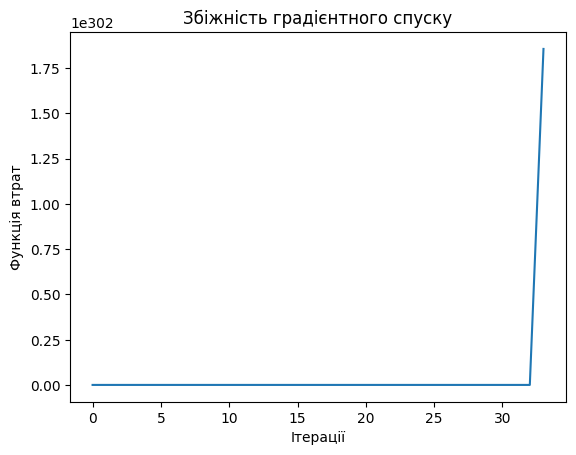

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hypothesis(X, theta):
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    return np.sum((hypothesis(X, theta) - y) ** 2) / (2 * len(y))

def gradient_descent(X, y, theta, alpha, num_iterations):
    costs = []
    for _ in range(num_iterations):
        gradient = np.dot(X.T, (hypothesis(X, theta) - y)) / len(y)
        theta -= alpha * gradient
        costs.append(compute_cost(X, y, theta))
    return theta, costs

X = np.array([[1, 2104, 5, 1],
              [1, 1416, 3, 2],
              [1, 1534, 3, 2],
              [1, 852, 2, 1]])
y = np.array([460, 232, 315, 178])

theta = np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 1000
theta_final, costs = gradient_descent(X, y, theta, alpha, num_iterations)

theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
plt.plot(costs)
plt.xlabel('Ітерації')
plt.ylabel('Функція втрат')
plt.title('Збіжність градієнтного спуску')
plt.show()
